<h3>EE5175 - ASSIGNMENT 5

<br>
GADHA PREMADASAN MALAYIL - NS24Z155<h3>



Import the necessary libraries

In [1]:
import numpy as np
import math
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image


Loading the images, finding A and B <br>
A and B was found mathematically ( on pen and paper)

In [2]:
image_1 = np.array(Image.open('Globe.png').convert("L"))
image_2 = np.array(Image.open('Nautilus.png').convert("L"))

N,N = image_1.shape[:2]
w2,h2 = image_2.shape[:2]
A = 2.0
B = (N*N)/(2*np.log(200))
N , A ,B

(195, 2.0, 3588.403390110064)

Making sigma matrix and size matrix.Sigma matrix is a matrix of size of the image.For each pixel, sigma will be different corresponding to the equation given.  Size matrix corresponds to the kernel size values for each sigma in sigma matrix. 

In [3]:
sigma_matrix = np.zeros((N,N))
size_matrix = np.zeros((N,N))

for m in range(N):
    for n in range(N):
        sigma = A*(np.exp(-((m-N/2)**2+(n-N/2)**2)/B))
        sigma_matrix[m,n] = sigma



for i in range(N):
    for j in range(N):
        k = math.ceil(6*sigma_matrix[i,j]) 
        if k%2 == 0:
            k+=1
        size_matrix[i,j] = int(k)
        # print(k)
        #   if k//2 
        #   size_matrix[m,n] = math.ceil(6*sigma)
print(size_matrix)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


<h4>Space Variant Bluring<h4>


Here we find the largest k so as to pad the image with that k. This code snippet convolves an input image with Gaussian kernels determined by sigma values and kernel sizes stored in `sigma_matrix` and `size_matrix`, respectively. It pads the input image and accumulates the convolved values in a canvas, then extracts the final processed image by removing the padding. 

In [4]:
largest_k = np.amax(size_matrix)
mid = int(largest_k//2) 
# print(mid)
# output_image = np.zeros((N+2*mid , N+2*mid))
# output_image[mid:-mid , mid:-mid] = image_1
# print(output_image.shape)
final_image = np.zeros((N,N))
canvas = np.zeros((N+2*mid , N+2*mid))
# print(canvas.shape)
for i in range(mid , N+mid):
    for j in range(mid,N+mid):
        sigma = sigma_matrix[i-mid, j-mid]
        l = int(size_matrix[i-mid,j-mid])
        kernel= np.zeros([l,l])
        l_mid = l//2
        normal = 1 / ( 2 * np.pi * sigma**2 )
        for x in range(l):
            for y in range(l):
             exp_term = np.exp((-(x-l_mid)**2-(y-l_mid)**2)/(2*(sigma**2)))
             kernel[x,y] = normal*exp_term
        kernel = kernel/np.sum(kernel)
        canvas[ i-l_mid : i+l_mid+1 , j-l_mid : j+l_mid+1 ] += image_1[i- mid , j - mid]*kernel

final_image = canvas[mid:-mid,mid:-mid]

Displaying the actual image and blurred image

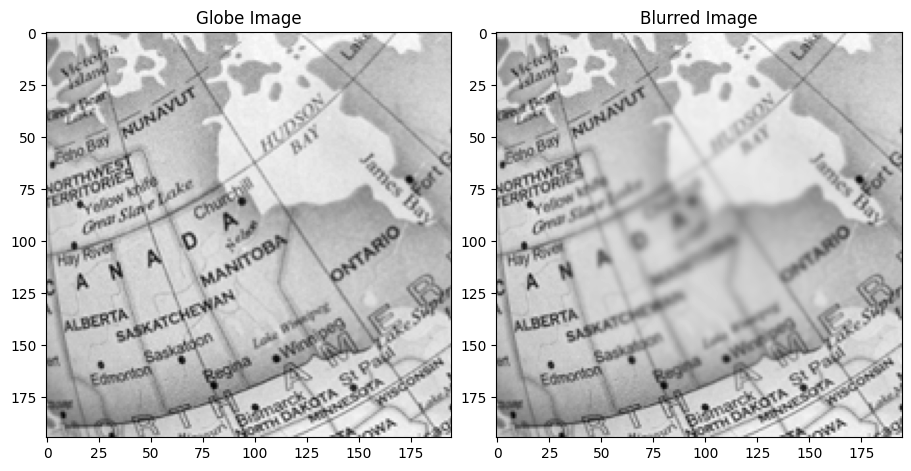

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(image_1,'gray')
ax1.title.set_text("Globe Image")  #setting title to the figure
ax2.imshow(final_image,'gray')       
ax2.title.set_text("Blurred Image")

Space Variant Blur is applied on Nautilius.png

In [6]:
sigma = 1.0
sigma_mat = sigma*np.ones((w2,h2),dtype=float)
k = int(np.ceil(6*sigma)+1)
k_mid = k//2
print(k_mid)
# output_image = np.zeros((w2+2*k_mid , h2+2*k_mid))
# output_image[k_mid:-k_mid , k_mid:-k_mid] = image_2

3


In [7]:
final_image = np.zeros((w2,h2))
canvas = np.zeros((w2+2*k_mid , h2+2*k_mid))

for i in range(k_mid, w2+k_mid):
    for j in range(k_mid, h2+k_mid):
        sigma = sigma_mat[i-k_mid, j-k_mid]
        kernel = np.zeros((k,k))
        normal = 1 / ( 2 * np.pi * sigma**2 )
        for x in range(k):
            for y in range(k):
             exp_term = np.exp((-(x-k_mid)**2-(y-k_mid)**2)/(2*(sigma**2)))
             kernel[x,y] = normal*exp_term
        kernel = kernel/np.sum(kernel)
        canvas[ i-k_mid : i+k_mid+1 , j-k_mid : j+k_mid+1 ] += image_2[i- k_mid , j - k_mid]*kernel

final_image = canvas[k_mid:-k_mid,k_mid:-k_mid]

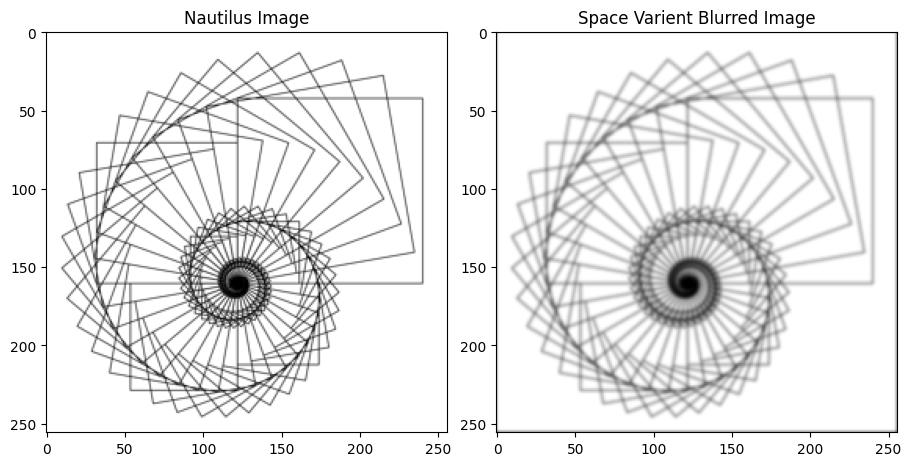

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(image_2,'gray')                #displaying gray scale image
ax1.title.set_text("Nautilus Image")   #setting title to the figure
ax2.imshow(final_image,'gray')       
ax2.title.set_text("Space Varient Blurred Image")

This is code for space invariant blurring - taken from previous assignment. We blur Nautilius with this blurring technique

In [9]:
# space invariant blur : (from assignment 4)
h,w = image_2.shape[:2]
sigma_ = 1.0

temp_out = np.zeros((h,w))
k_ = math.ceil(6*sigma_)+1
k_mid_ = k_//2
print(k_mid_)
k_mid_ = k_//2
output_image = np.zeros((h, w))
output_image = np.pad(image_2,(int(( k_ - 1 )/2), int(( k_ - 1 )/2)), 'constant')

gaussian_filter = np.zeros((k_,k_) , np.float32)
for y in range(-k_mid_ , k_mid_+1):
    for x in range(-k_mid_ , k_mid_+1 ):
        normal = 1 / ( 2 * np.pi * sigma_**2 )
        exp_term = np.exp(-( x**2 + y**2 ) / (2 * sigma_**2))
        gaussian_filter [ y + k_mid_ , x + k_mid_ ] = normal * exp_term
    
gaussian_filter = gaussian_filter/np.sum(gaussian_filter)

for x in range(k_mid_ , h + k_mid_):
    for y in range(k_mid_ , w + k_mid_):
        op = 0
        for i in range(k_):
         for j in range(k_):
            op+= gaussian_filter[i,j]*output_image[x-k_mid_+i , y - k_mid_+j]
        temp_out[x-k_mid_ , y - k_mid_] = op



3


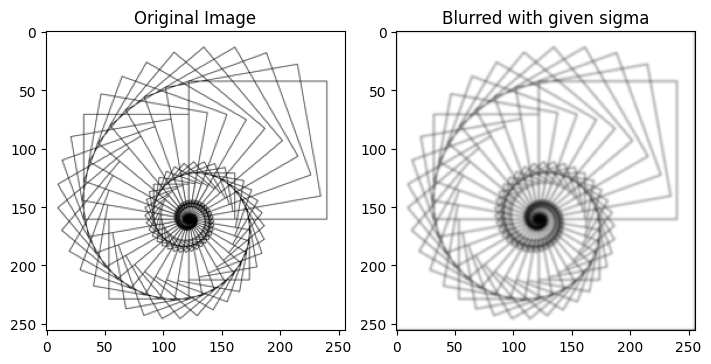

In [10]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,7), constrained_layout=True)
ax1.imshow(image_2,'gray')                #displaying gray scale image
ax1.title.set_text("Original Image")  #setting title to the figure
ax2.imshow(temp_out,'gray')       
ax2.title.set_text("Blurred with given sigma")

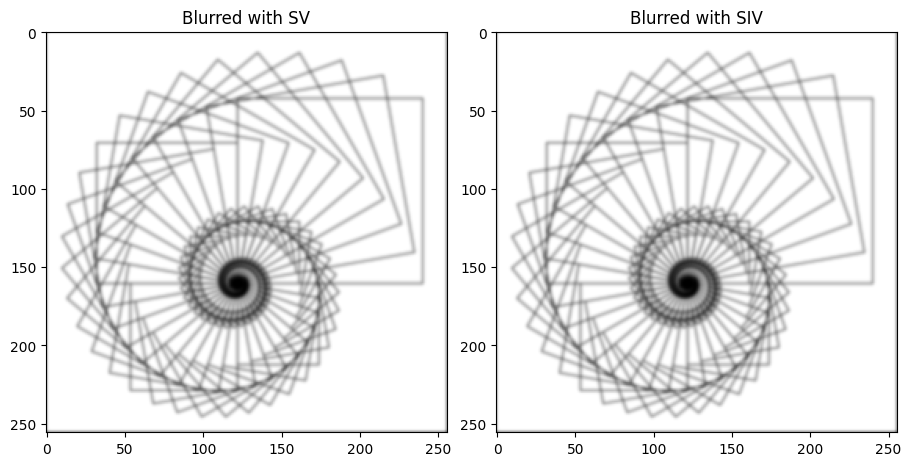

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(final_image,'gray')                #displaying gray scale image
ax1.title.set_text("Blurred with SV")    #setting title to the figure
ax2.imshow(temp_out,'gray')       
ax2.title.set_text("Blurred with SIV")

Here we find the difference of the two blurring. While printing, it shows very minimal ( in range of e^-6 difference). Therefore both blurring gives essentially same result.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


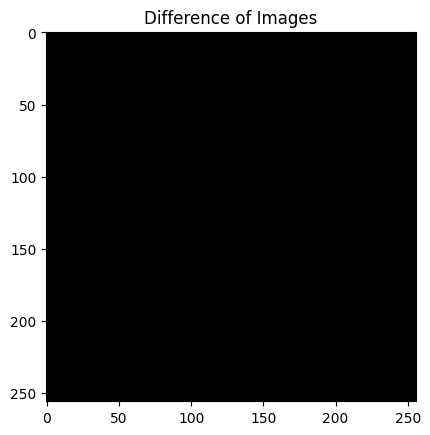

In [12]:
difference = np.floor(np.abs(final_image - temp_out))
print(difference)
plt.imshow(difference,"gray")
plt.title("Difference of Images")
plt.show()